# Kaggle Springleaf competition

Beating the benchmark @ Kaggle Springleaf

Basis code provided by Abhishek Thakur

Further edits made by Wendell Kuling

In [1]:
import pandas as pd
import numpy as np
import xgboost as xgb
import re
from datetime import datetime

from sklearn import preprocessing, linear_model
%matplotlib inline

Reading the data in the Pandas Dataframe

In [2]:
train = pd.read_csv('~/ipython/Kaggle_springleaf/Input/train.csv')
test = pd.read_csv('~/ipython/Kaggle_springleaf/Input/test.csv')

/Users/wendellkuling/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (8,9,10,11,12,43,157,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)
/Users/wendellkuling/anaconda/lib/python2.7/site-packages/pandas/io/parsers.py:1170: DtypeWarning: Columns (8,9,10,11,12,43,157,167,177,196,214,225,228,229,231,235,238) have mixed types. Specify dtype option on import or set low_memory=False.
  data = self._reader.read(nrows)


The error messages can be ignored, they also appear when specifying the data type

# 1. Data exploration

Quick exploration of the data

In [3]:
train.head(5).T

,0,1,2,3,4
ID,2,4,5,7,8
VAR_0001,H,H,H,H,R
VAR_0002,224,7,116,240,72
VAR_0003,0,53,3,300,261
VAR_0004,4300,4448,3464,3200,2000
VAR_0005,C,B,C,C,N
VAR_0006,0,1,0,0,0
VAR_0007,0,0,0,0,0
VAR_0008,False,False,False,False,False
VAR_0009,False,False,False,False,False


In [4]:
train.info(verbose = True, null_counts = True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 145231 entries, 0 to 145230
Data columns (total 1934 columns):
ID          145231 non-null int64
VAR_0001    145231 non-null object
VAR_0002    145231 non-null int64
VAR_0003    145231 non-null int64
VAR_0004    145231 non-null int64
VAR_0005    145231 non-null object
VAR_0006    145175 non-null float64
VAR_0007    145175 non-null float64
VAR_0008    145175 non-null object
VAR_0009    145175 non-null object
VAR_0010    145175 non-null object
VAR_0011    145175 non-null object
VAR_0012    145175 non-null object
VAR_0013    145175 non-null float64
VAR_0014    145175 non-null float64
VAR_0015    145175 non-null float64
VAR_0016    145175 non-null float64
VAR_0017    145175 non-null float64
VAR_0018    145175 non-null float64
VAR_0019    145175 non-null float64
VAR_0020    145175 non-null float64
VAR_0021    145175 non-null float64
VAR_0022    145175 non-null float64
VAR_0023    145175 non-null float64
VAR_0024    145175 non-null float64
VA

In [5]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,145231,1.451250e+05,8.389029e+04,2,72342.5,145272,217686.5,290463
VAR_0002,145231,1.052780e+02,1.433512e+02,0,24.0,60,132.0,999
VAR_0003,145231,8.849228e+01,1.259033e+02,0,13.0,55,120.0,999
VAR_0004,145231,3.721946e+03,1.228001e+04,0,1790.0,2500,3600.0,2200000
VAR_0006,145175,6.939074e-01,1.604578e+00,0,0.0,0,1.0,68
VAR_0007,145175,5.131600e-01,1.175310e+00,0,0.0,0,1.0,66
VAR_0013,145175,6.939074e-01,1.604578e+00,0,0.0,0,1.0,68
VAR_0014,145175,4.944929e-01,1.115085e+00,0,0.0,0,1.0,67
VAR_0015,145175,4.767625e-01,1.000755e+00,0,0.0,0,1.0,35
VAR_0016,145175,1.447598e+00,1.132784e+00,0,1.0,1,1.0,39


# 2. Data preprocessing

## 2.1 Splitting off the target and the ID column

First, store the target variable in a Pandas series y and stripping the ID and target from the feature dataframes

In [6]:
y = train.target.values
train = train.drop(['ID', 'target'], axis=1)
test = test.drop('ID', axis=1)

A first important decision is how to deal with the missing values. Sometimes, the missing values are 'NAs', sometimes '-1'. Let's make that consistent first.

In [7]:
train = train.replace(-1, np.nan)
test = test.replace(-1, np.nan)

## 2.2 Dealing with missing values

One of the tricks, is to first count the number of NAs and '99s' (outliers) per row.

In [8]:
# Add a row wise count of NA’s 

train['NumbNAs'] = train.apply(lambda x : x.isnull().sum(), axis = 1)
test['NumbNAs'] = train.apply(lambda x : x.isnull().sum(), axis = 1)

In [9]:
# and row wise count of outliers (those 999…’s). 

train['Numb99s'] = train.apply(lambda x : x.astype(str).str.contains('99').sum(), axis = 1)
test['Numb99s'] = test.apply(lambda x : x.astype(str).str.contains('99').sum(), axis = 1)

Inspecting the resulting dataframe...

In [10]:
train['NumbNAs'].head(5)

0    47
1    42
2    74
3    69
4    67
Name: NumbNAs, dtype: int64

In [11]:
train['Numb99s'].head(5)

0    467
1    244
2    413
3    294
4    344
Name: Numb99s, dtype: int64

Although even only columns with NA vs. 'False' might imply information, it turns out that just dropping these low cardinality columns gives the best results.

In [12]:
train = train.dropna(axis=1, thresh=2000)
test = test.dropna(axis=1, thresh=2000)

In [13]:
train = train.fillna(-1)
test = test.fillna(-1)

## 2.3 Processing time-related variables: right format and distances between them

In [14]:
# Helper function to process some of the day observations
def timetodaysago(timeobs):
    try:
        d0 = datetime.strptime(timeobs[:7], '%d%b%y')
        d1 = datetime.strptime('01SEP15', '%d%b%y')
        delta = d1 - d0
        return delta.days
    except:
        return timeobs

In [15]:
def isdate(seriestocheck):
    p = re.compile(r'\w{7}:\d{2}:\d{2}:\d{2}') # regex for our datetime format
    for check in seriestocheck:
        if p.match(str(check)):
            return True

First, converting the time stamps to a useful number

In [16]:
datecolumns = []
for f in train.columns:
    top_values = pd.Series(list(train[f].value_counts().keys()))[:10]
    if isdate(top_values):
        print "Variable: " + f + " is of type date. Converting."
        datecolumns.append(f)
        train[f]=train[f].map(timetodaysago)
        train[f]=train[f].astype('float64')
        test[f]=test[f].map(timetodaysago)
        test[f]=test[f].astype('float64')

Variable: VAR_0073 is of type date. Converting.
Variable: VAR_0075 is of type date. Converting.
Variable: VAR_0156 is of type date. Converting.
Variable: VAR_0158 is of type date. Converting.
Variable: VAR_0159 is of type date. Converting.
Variable: VAR_0166 is of type date. Converting.
Variable: VAR_0167 is of type date. Converting.
Variable: VAR_0168 is of type date. Converting.
Variable: VAR_0169 is of type date. Converting.
Variable: VAR_0176 is of type date. Converting.
Variable: VAR_0177 is of type date. Converting.
Variable: VAR_0178 is of type date. Converting.
Variable: VAR_0179 is of type date. Converting.
Variable: VAR_0204 is of type date. Converting.
Variable: VAR_0217 is of type date. Converting.


Second, calculating the distances between the time stamps

In [17]:
import itertools

for pair in itertools.combinations(datecolumns, 2):
    print "Adding distance between ", pair
    train[pair[0]+pair[1]] = train[pair[0]] - train[pair[1]]
    test[pair[0]+pair[1]] = test[pair[0]] - test[pair[1]]

Adding distance between  ('VAR_0073', 'VAR_0075')
Adding distance between  ('VAR_0073', 'VAR_0156')
Adding distance between  ('VAR_0073', 'VAR_0158')
Adding distance between  ('VAR_0073', 'VAR_0159')
Adding distance between  ('VAR_0073', 'VAR_0166')
Adding distance between  ('VAR_0073', 'VAR_0167')
Adding distance between  ('VAR_0073', 'VAR_0168')
Adding distance between  ('VAR_0073', 'VAR_0169')
Adding distance between  ('VAR_0073', 'VAR_0176')
Adding distance between  ('VAR_0073', 'VAR_0177')
Adding distance between  ('VAR_0073', 'VAR_0178')
Adding distance between  ('VAR_0073', 'VAR_0179')
Adding distance between  ('VAR_0073', 'VAR_0204')
Adding distance between  ('VAR_0073', 'VAR_0217')
Adding distance between  ('VAR_0075', 'VAR_0156')
Adding distance between  ('VAR_0075', 'VAR_0158')
Adding distance between  ('VAR_0075', 'VAR_0159')
Adding distance between  ('VAR_0075', 'VAR_0166')
Adding distance between  ('VAR_0075', 'VAR_0167')
Adding distance between  ('VAR_0075', 'VAR_0168')


## 2.4 Dealing with location-based features

Zip code var 241, 212 (+ID?), 274, 237

Although it seemed logical to me to drop the high-cardinality variables like zip-code, as I expected that an algorithm treating this as a numerical variable would be confused as to the predictive value, from the Kaggle posts it seemed that variable 212 (zip+ID) turns out to have quite an important predictive value.

Way to handle them: 
* Keeping the values in 274, 237 (they will be label-encoded below)
* Adding the mean of the target variable for both 274 and 237 (clustering)
* Dropping 241
* Keep in 212 as a numerical variable

In [18]:
temp = train[['VAR_0274', 'VAR_0237']]
temp['target'] = y

# Putting np.nan back in to facilitate the working of groupby (calculating mean)
temp = temp.applymap(lambda x: np.nan if x == -1 else x)

tempmean_237 = temp.groupby(['VAR_0237']).mean()
searchmean_237 = tempmean_237['target'].to_dict()

tempmean_274 = temp.groupby(['VAR_0274']).mean()
searchmean_274 = tempmean_274['target'].to_dict()

train['at_237'] = train['VAR_0237'].map(lambda x: searchmean_237[x] if (x in searchmean_237) else -1)
test['at_237'] = test['VAR_0237'].map(lambda x: searchmean_237[x] if (x in searchmean_237) else -1)

train['at_274'] = train['VAR_0274'].map(lambda x: searchmean_274[x] if (x in searchmean_274) else -1)
test['at_274'] = test['VAR_0274'].map(lambda x: searchmean_274[x] if (x in searchmean_274) else -1)


/Users/wendellkuling/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


Dropping the 241 variable of the zip-code now. Note that the description of the location (2741 and 237) will be label-encoded below.

In [19]:
train.drop(['VAR_0241'], axis = 1, inplace = True)
test.drop(['VAR_0241'], axis = 1, inplace = True)

## 2.5 Dealing with age-related features

From https://www.kaggle.com/darraghdog/springleaf-marketing-response/grouping-numerics-springleaf
We know that VAR_0254, VAR_0255 and VAR_0198 are likely to be age features

Creating three columns: one with the best estimate for age, one with avg target score per age-category, 
* one with avg stdev of target per age-category 
* dropped the stdev one after experimentation

In [20]:
temp = train[['VAR_0254', 'VAR_0255', 'VAR_0198']]
temp = temp.applymap(lambda x: np.nan if x == -1 else x)
temp['age'] = temp.min(axis='columns')
temp['age'] = temp['age'].astype(np.float64)
temp.drop(['VAR_0254', 'VAR_0255', 'VAR_0198'], axis = 1, inplace = True)

temp['target'] = y

tempmean = temp.groupby(['age']).mean()
searchmean = tempmean['target'].to_dict()

# tempstd = temp.groupby(['age']).std()
# searchstd = tempstd['target'].to_dict()

temp['at_age'] = temp['age'].map(lambda x: searchmean[x] if (not pd.isnull(x)) else -1)
# temp['st_age'] = temp['age'].map(lambda x: searchstd[x] if (not pd.isnull(x)) else -1)

train['age'] = temp['age']
train['at_age'] = temp['at_age']
# train['st_age'] = temp['st_age']


temp = test[['VAR_0254', 'VAR_0255', 'VAR_0198']]
temp = temp.applymap(lambda x: np.nan if x == -1 else x)
temp['age'] = temp.min(axis='columns')
temp['age'] = temp['age'].astype(np.float64)
temp['at_age'] = temp['age'].map(lambda x: searchmean[x] if (x in searchmean) else -1)
# temp['st_age'] = temp['age'].map(lambda x: searchstd[x] if (x in searchstd) else -1)

test['age'] = temp['age']
test['at_age'] = temp['at_age']
# test['st_age'] = temp['st_age']

In [21]:
train.drop(['VAR_0254', 'VAR_0255', 'VAR_0198'], axis = 1, inplace = True)
test.drop(['VAR_0254', 'VAR_0255', 'VAR_0198'], axis = 1, inplace = True)

## 2.6 Dealing with other categorical features

I've struggled a lot with this part... Options considered were:
* One-hot encoding all non-value types using pd.get_dummies (Cardinality <= 60 and at least 30 observations)
* Hashing trick (for LR)

However, just using Labelencoder turns out to work best in dealing with these variables when using XGBoost as classifier. The fact that XGBoost works on the best split of instances, can also be concluded by looking at the documentation from XGBoost on http://xgboost.readthedocs.org/en/latest/model.html#learn-the-tree-structure.

So, although one-hot encoding would allow in theory for more relationships between the variables, it also makes the dataset more 'noisy'. This 'noise' effect proved to be much stronger than I expected initially. 

In [22]:
for f in train.columns:
    if train[f].dtype=='object': 
        print f
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train[f].values) + list(test[f].values))
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))                    

VAR_0001
VAR_0005
VAR_0008
VAR_0009
VAR_0010
VAR_0011
VAR_0012
VAR_0043
VAR_0044
VAR_0196
VAR_0200
VAR_0202
VAR_0216
VAR_0222
VAR_0226
VAR_0229
VAR_0230
VAR_0232
VAR_0236
VAR_0237
VAR_0239
VAR_0274
VAR_0283
VAR_0305
VAR_0325
VAR_0342
VAR_0352
VAR_0353
VAR_0354
VAR_0404
VAR_0466
VAR_0467
VAR_0493
VAR_1934


# 2.7 Clustering binary variables

This section clusters the binary variables, as suggested by Mike Kim in https://www.kaggle.com/c/springleaf-marketing-response/forums/t/17081/solution-sharing. Unfortunately, the Sklearn version doesn't manage to cluster the features in memory using T-SNE (>50 GB). Therefore, switching to DBSCAN here.

In [25]:
temptrain = pd.DataFrame()
temptest = pd.DataFrame()
lbl = preprocessing.LabelEncoder()

for f in train.columns:
    t = train[f].value_counts()
    if (len(t) == 2):
        print f, " is binary... adding to DataFrame to cluster"
        lbl.fit(list(train[f].values) + list(test[f].values)) # trick to convert to 0/1 always
        train[f] = lbl.transform(list(train[f].values))
        test[f] = lbl.transform(list(test[f].values))                    
        temptrain[f] = train[f]
        temptest[f] = test[f]

VAR_0008  is binary... adding to DataFrame to cluster
VAR_0009  is binary... adding to DataFrame to cluster
VAR_0010  is binary... adding to DataFrame to cluster
VAR_0011  is binary... adding to DataFrame to cluster
VAR_0012  is binary... adding to DataFrame to cluster
VAR_0018  is binary... adding to DataFrame to cluster
VAR_0019  is binary... adding to DataFrame to cluster
VAR_0020  is binary... adding to DataFrame to cluster
VAR_0021  is binary... adding to DataFrame to cluster
VAR_0022  is binary... adding to DataFrame to cluster
VAR_0023  is binary... adding to DataFrame to cluster
VAR_0024  is binary... adding to DataFrame to cluster
VAR_0025  is binary... adding to DataFrame to cluster
VAR_0026  is binary... adding to DataFrame to cluster
VAR_0027  is binary... adding to DataFrame to cluster
VAR_0028  is binary... adding to DataFrame to cluster
VAR_0029  is binary... adding to DataFrame to cluster
VAR_0030  is binary... adding to DataFrame to cluster
VAR_0031  is binary... addin

In [27]:
from sklearn.cluster import DBSCAN

temptrain = np.array(temptrain)
temptest = np.array(temptest)
temp = np.concatenate((temptrain, temptest), axis=0)

db = DBSCAN(eps=0.3, min_samples=500).fit(temp) # I want the clusters to be of a reasonable size
labels = db.labels_

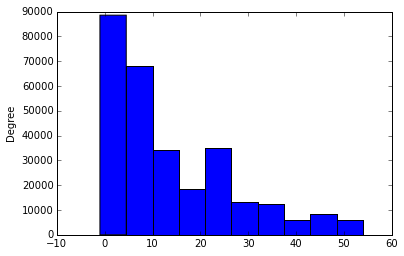

In [28]:
pd.Series(labels).plot(kind='hist')

In [29]:
print max(labels)

54


So, there are 54 clusters found in the binary data. Adding those to the original dataframes.

In [30]:
train['cluster']=labels[:len(train)]

In [31]:
test['cluster']=labels[len(train):]

And that concludes the preprocessing

# 3. Building the prediction model

In [32]:
X = np.array(train)
X_test = np.array(test)

In [33]:
dtrain = xgb.DMatrix(X, label=y, missing = np.nan)

Setting the parameters for training

In [34]:
param = {"objective": "binary:logistic", "eta": 0.015, "max_depth": 22, "min_child_weight": 3, 
         "subsample": 0.7, "colsample_bytree": 0.7, "seed": 231, 
         "eval_metric":"auc"} 
num_rounds = 2125

In [35]:
clf = xgb.train(param, dtrain, num_rounds)

Saving the model for future use

In [36]:
clf.save_model('0152230707231.model')

Now, making the predictions

In [39]:
dtest = xgb.DMatrix(X_test, missing = np.nan)
preds = clf.predict(dtest)
print preds[:10]

[ 0.2442698   0.28070626  0.11513605  0.07711784  0.82753664  0.01850388
  0.00844243  0.01040071  0.05037839  0.00590222]


#### Sidenote (lesson learned)

I used to train through the Scikit-Learn Wrapper, but this had two important disadvantages:
* It didn't allow me to set all the parameters (like num-rounds)
* It didn't allow me to get feature importance (needed for the ensemble trick further down)

```
X = np.array(train)
X_test = np.array(test)
clf = xgb.XGBClassifier(n_estimators=5000, nthread=-1, max_depth=17, 
                        learning_rate=0.01, silent=False, subsample=0.8, colsample_bytree=0.7)

# Starting the fitting of the model

clf.fit(X, y, eval_metric = 'auc', verbose = True)
```

Writing the submission file

In [40]:
sample = pd.read_csv('~/ipython/Kaggle_springleaf/Input/sample_submission.csv')
sample.target = preds
sample.to_csv('20151114_fully_preprocessed_XGB_0152230707231.csv', index=False)

What does the submission look like now...

<img src="../files/Screenshot.png">

# 4 Studying feature importance

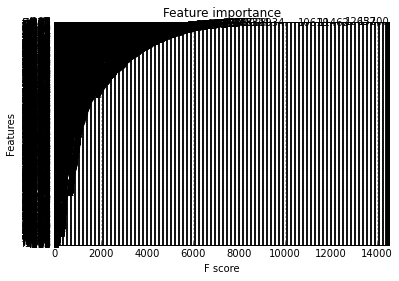

In [41]:
xgb.plot_importance(clf)

In [107]:
importance = clf.get_fscore()
len(importance)
len(importance.keys())

1902

In [108]:
df = pd.DataFrame(zip(importance.keys(),importance.values()), columns = ['feature', 'fscore'])
df.sort('fscore', ascending=False, inplace=True)

In [109]:
df['fscore'] = df['fscore'] / df['fscore'].sum()

In [130]:
df.head(15)

,feature,fscore
1136,f3,0.006339
956,f197,0.006078
691,f208,0.005504
1135,f2,0.005099
1134,f1,0.004290
360,f310,0.003996
181,f1478,0.003794
1124,f233,0.003737
509,f1920,0.003605
1335,f528,0.003550


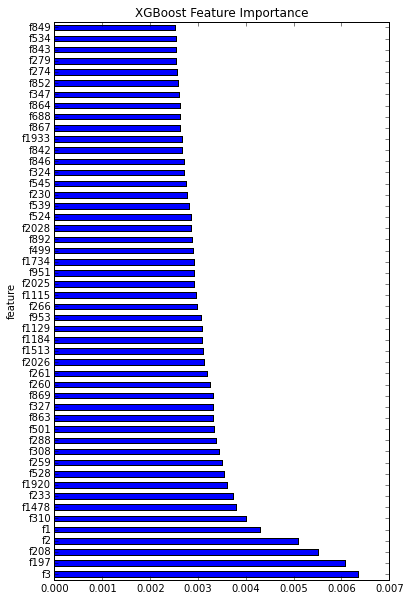

In [111]:
import matplotlib.pyplot as plt
df[:50].plot(kind='barh', x='feature', y='fscore', legend=False, figsize=(6, 10),
             title='XGBoost Feature Importance')

# 5 Ensemble method resampled from feature importance + LR

First, making sub-sets of X_test and X using every 5th importance feature

In [174]:
selectfeat=[[] for _ in range(5)]
for i in range(len(importance)):
    toadd = df.iat[i,0]
    toadd = toadd[1:] #stripping the 'f' from the string
    toadd = int(toadd)
    selectfeat[i % 5].append(toadd)

In [175]:
print selectfeat[1]

[197, 1478, 308, 869, 1184, 2025, 2028, 324, 688, 279, 965, 2029, 859, 1918, 1299, 1140, 563, 691, 315, 597, 878, 636, 700, 964, 570, 1438, 568, 875, 838, 1304, 853, 837, 706, 926, 1937, 901, 1480, 1312, 1103, 933, 881, 692, 632, 832, 1731, 807, 847, 617, 1117, 1496, 1943, 319, 902, 1340, 1798, 1109, 1107, 818, 704, 1543, 1322, 917, 1302, 1479, 676, 1318, 2003, 1812, 975, 972, 304, 925, 1098, 599, 283, 1996, 839, 921, 1121, 1902, 1206, 1003, 973, 1079, 1243, 1558, 1152, 300, 1182, 1065, 1382, 318, 777, 236, 468, 2021, 311, 350, 329, 559, 947, 960, 1969, 1873, 865, 1205, 344, 1338, 886, 72, 1106, 1331, 275, 1820, 1001, 221, 880, 1296, 1375, 732, 1926, 1371, 990, 1369, 988, 1695, 1031, 204, 1743, 1315, 1300, 1862, 1245, 789, 1260, 1202, 1023, 1979, 87, 1856, 1870, 554, 1372, 248, 1393, 1402, 1259, 1440, 1027, 88, 1168, 1353, 1085, 1012, 1280, 1039, 680, 1114, 607, 1161, 80, 1279, 1002, 709, 489, 15, 1278, 1017, 1931, 1025, 1897, 781, 1154, 895, 1807, 811, 674, 391, 1727, 77, 1289, 1362, 

In [184]:
Sub_X_train = [[] for _ in range(5)]
Sub_X_test = [[] for _ in range(5)]
for i in range(5):
    Sub_X_train[i] = X[:, selectfeat[i]]
    Sub_X_test[i] = X_test[:, selectfeat[i]]

Second, building models per selected sub-set

In [189]:
%whos

Variable         Type            Data/Info
------------------------------------------
DBSCAN           type            <class 'sklearn.cluster.dbscan_.DBSCAN'>
Sub_X_test       list            n=5
Sub_X_train      list            n=5
X                ndarray         145231x2030: 294818930 elems, type `float64`, 2358551440 bytes (2249 Mb)
X_test           ndarray         145232x2030: 294820960 elems, type `float64`, 2358567680 bytes (2249 Mb)
clf              Booster         <xgboost.core.Booster object at 0x196356a90>
datecolumns      list            n=15
datetime         type            <type 'datetime.datetime'>
db               DBSCAN          DBSCAN(algorithm='auto', <...>=None, random_state=None)
df               DataFrame            feature        fscor<...>\n[1902 rows x 2 columns]
dtest            DMatrix         <xgboost.core.DMatrix object at 0x14c8d39d0>
dtrain           DMatrix         <xgboost.core.DMatrix object at 0x196356990>
f                str             at_age
i   

Third, building a LR model on these scores, including the version from the LR with hashing trick

# Suggested further steps:

## Data preprocessing
* Insert score from LR with hashing trick (now planned for the ensemble part)


## Tuning
* Run with more num_rounds
* Use other treshold for 2000 in dropna
* Grid search on performance
* Try other parameters
    * {"objective": "binary:logistic", "eta": 0.015, "max_depth": 22, "min_child_weight": 3, "subsample": 0.7, "colsample_bytree": 0.7, "seed": 231, "eval_metric":"auc"} num_rounds = 2125
    * {objective = "binary:logistic", eta = 0.0025, max_depth = 15, subsample = 0.7, colsample_bytree = 0.5, min_child_weight = 4, eval_metric = "auc", alpha = 1)


## Ensemble tries
* Use leaf nodes from XGBoost with FM (using Spark cluster)
* Get feature importance list, split all the ranked feature set into 5 groups by idx mod 5 > Ensemble this

